In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt 
import matplotlib
import re
from datetime import datetime
from wordcloud import WordCloud 
import jieba
import jieba.analyse
from datetime import date

In [2]:
df_1 = pd.read_csv('./explore/FB_inner-1.csv')
df_2 = pd.read_csv('./explore/FB_inner-2.csv')
df_3 = pd.read_csv('./explore/FB_inner-3.csv')

In [3]:
len(df_1)+len(df_2)+len(df_3)

8623

合併資料集

關鍵字 :
裕隆日產汽車、裕隆汽車、中華汽車、納智捷汽車、鴻華先進、格上租車、裕融企業

In [4]:
df_ = pd.concat([df_1,df_2,df_3],axis=0)
df_.drop(['dataSource', 'reaction_wow_count', 'reaction_haha_count',
       'ig_username', 'n', 'reaction_all_count', 'reaction_haha',
       'reaction_love', 'reaction_like', 'reaction_like_count',
       'engagement_score', 'reaction_sad_count', 'website', 'type',
       'share_count', 'fromid', 'follower_count', 'followers_count',
       'reaction_love_count', 'commentcount',
       'talking_about_count', 'fromname_t', 'fan_count', 'reaction_angry',
       'reaction_sad', 'reaction_angry_count', 'message', 'created_time',
       'sharecount', 'reaction_wow', 'reaction_all'], axis=1, inplace=True)

In [5]:
df_ = df_[~df_.artUrl.duplicated()]
df_.drop(['system_id'], axis=1, inplace=True)
df_.reset_index()
df_

,artDate,artUrl,artPosterUrl,artPoster,artContent,comment_count
0,2021-11-26 14:15:11,https://fb.com/114009453350823_283462350459804,https://fb.com/114009453350823,楊勇緯 Yang Yung Wei,\n【快訊】#阿布達比大滿貫賽🥋\n恭喜 勇緯摘下個人生涯第一面大滿貫賽金牌🥇\n—\n #...,2213
1,2022-04-01 14:55:31,https://fb.com/114009453350823_362101982595840,https://fb.com/114009453350823,楊勇緯 Yang Yung Wei,\n🎊 恭喜 勇緯奪得 #2022安塔利亞大滿貫賽 金牌🥇\n－\n 2022年好的開始\n...,1060
2,2022-06-24 09:57:56,https://fb.com/114009453350823_417345683738136,https://fb.com/114009453350823,楊勇緯 Yang Yung Wei,\n【快訊】\n🎊 恭喜 勇緯奪得 #2022烏蘭巴托大滿貫賽 銀牌🥈\n比賽辛苦了👏🏼👏🏼...,729
3,2022-08-04 11:47:35,https://fb.com/114009453350823_445920040880700,https://fb.com/114009453350823,楊勇緯 Yang Yung Wei,\n【快訊】\n 恭喜 勇緯奪得 #2022哈薩克亞洲柔道錦標賽 銅牌🥉\n\n勇緯、真豪兩...,416
4,2021-12-22 00:00:00,https://fb.com/596023980420209_4748332441855988,https://fb.com/596023980420209,來趣新北金發局,來趣新北金發局 is at 我的新北市.\n【🎉#新北振興加倍奉還 第一波登錄發票 #中獎公...,2647
...,...,...,...,...,...,...
1928,2022-10-27 12:57:05,https://fb.com/489785751141341_491983052964210,https://fb.com/489785751141341,萬華分局莒光派出所,萬華分局莒光派出所 is at 日產裕隆汽車萬華廠.\n檢察官來電請查證，莒光派出所關心您!\n,0
1929,2022-11-18 05:33:00,https://fb.com/1835460230018012_3339768749587145,https://fb.com/1835460230018012,ETtoday車雲,後年就會看到一堆n⁷在路上跑了XD（杜克）\nhttps://speed.ettoday.n...,0
1930,2022-11-26 06:51:58,https://fb.com/1965045223741836_3398875300358814,https://fb.com/1965045223741836,新竹區監理所-跨機關高齡者交通安全宣導團,111年11月25日跨機關宣導團成果研習活動，感謝裕隆汽車製造廠協助本次活動並順利圓滿完成，...,0
1931,2022-11-11 06:04:35,https://fb.com/489785751141341_503171151845400,https://fb.com/489785751141341,萬華分局莒光派出所,萬華分局莒光派出所 is at 日產裕隆汽車萬華廠.\n一年一度雙11購物節即將來臨🛍🎁願望...,0


In [6]:
df_.shape

(8347, 6)

##### 使中文能正常顯示

In [7]:
plt.rcParams['font.sans-serif']=['SimHei'] 
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False

### 資料前處理
* 資料初步清理

In [8]:
df_ = df_.dropna() #清除空值
df_.artContent = df_.artContent.apply(lambda x : re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE)) #清除連結

In [9]:
def cleanNext(txt):
    txt = txt.replace('\n', '')
    return txt
def cleanPeriod(txt):
    txt = txt.replace('\n','。')
    return txt

In [10]:
df_.artContent = df_.artContent.apply(lambda x : cleanPeriod(x)) #換字符為句號
# df_.artContent = df_.artContent.apply(lambda x : cleanNext(x)) #清除換行

* 斷句

In [11]:
def splitSent(txt):
    result=list()
    tmpList = re.split('。',txt)#斷句
    for i in tmpList:
        if len(i)>1 :
            result.append(i)
    return result

In [12]:
df_.artContent = df_.artContent.apply(lambda x : splitSent(x)) # 斷句
df_ = df_.explode('artContent')
df_

,artDate,artUrl,artPosterUrl,artPoster,artContent,comment_count
0,2021-11-26 14:15:11,https://fb.com/114009453350823_283462350459804,https://fb.com/114009453350823,楊勇緯 Yang Yung Wei,【快訊】#阿布達比大滿貫賽🥋,2213
0,2021-11-26 14:15:11,https://fb.com/114009453350823_283462350459804,https://fb.com/114009453350823,楊勇緯 Yang Yung Wei,恭喜 勇緯摘下個人生涯第一面大滿貫賽金牌🥇,2213
0,2021-11-26 14:15:11,https://fb.com/114009453350823_283462350459804,https://fb.com/114009453350823,楊勇緯 Yang Yung Wei,#UnderArmour,2213
0,2021-11-26 14:15:11,https://fb.com/114009453350823_283462350459804,https://fb.com/114009453350823,楊勇緯 Yang Yung Wei,#台灣大哥大OpenPossible,2213
0,2021-11-26 14:15:11,https://fb.com/114009453350823_283462350459804,https://fb.com/114009453350823,楊勇緯 Yang Yung Wei,#財團法人臺灣防盲基金會,2213
...,...,...,...,...,...,...
1931,2022-11-11 06:04:35,https://fb.com/489785751141341_503171151845400,https://fb.com/489785751141341,萬華分局莒光派出所,雙11購物，千萬要小心,0
1932,2022-12-27 14:46:24,https://fb.com/391337934288286_544610901015590,https://fb.com/391337934288286,太陽能 種電 綠色金礦 節能減碳 再生能源搜集,看準綠能儲能商機，三大汽車集團－和泰、裕隆、三陽「電」力全開！看準綠電發展趨勢，及未來儲能事...,0
1932,2022-12-27 14:46:24,https://fb.com/391337934288286_544610901015590,https://fb.com/391337934288286,太陽能 種電 綠色金礦 節能減碳 再生能源搜集,和泰集團透過和潤電能建置太陽能電廠，年底前建置容量挑戰100MW,0
1932,2022-12-27 14:46:24,https://fb.com/391337934288286_544610901015590,https://fb.com/391337934288286,太陽能 種電 綠色金礦 節能減碳 再生能源搜集,裕隆汽車在三義廠建置太陽能發電設備，2025年前裝置容量要達20.2MW，並打造年容量1GW...,0


* 斷詞

In [13]:
#設定繁體中文詞庫
jieba.set_dictionary('./dict/dict.txt.big')
#新增自定義字典
jieba.load_userdict('./dict/user_dict.txt')
#新增stop words
#jieba.analyse.set_stop_words('./dict/stop_words.txt') #jieba.analyse.extract_tags才會作用
with open('./dict/stopwords.txt',encoding="utf-8") as f:
    stopWords = [line.strip() for line in f.readlines()]

Building prefix dict from c:\D\中山\31lab\裕隆日產\dict\dict.txt.big ...
Loading model from cache C:\Users\User\AppData\Local\Temp\jieba.u8f690af6935baf7001a90ebf9d4408ff.cache
Loading model cost 2.138 seconds.
Prefix dict has been built succesfully.


In [14]:
def getToken(row):
    
    seg_list = jieba.lcut(row)
    seg_list = [w for w in seg_list if w not in stopWords and len(w) > 1] # 篩選不在停用字的字與字元數大於1的字詞
    return seg_list

In [15]:
df_['word'] =df_.artContent.apply(getToken)

In [ ]:
df_token = df_.explode('word') # 將word欄位展開

* 轉換日期格式

In [ ]:
df_.head()

In [19]:
df_["Date"] = pd.to_datetime(df_['artDate'], format = "%Y-%m-%d %H:%M:%S").dt.date
df_["time"] = pd.to_datetime(df_['artDate'], format = "%Y-%m-%d %H:%M:%S").dt.time

In [20]:

df_token["Date"] = pd.to_datetime(df_token['artDate'], format = "%Y-%m-%d %H:%M:%S").dt.date
df_token["time"] = pd.to_datetime(df_token['artDate'], format = "%Y-%m-%d %H:%M:%S").dt.time

* 計算詞頻

In [47]:
# word_count = df_token.groupby(['Date','word'],as_index=False).size()
# word_count.sort_values(by=['size'], ascending=False,inplace=True)  #排序
# word_count = word_count[word_count['size']>3]  #過濾出現太少次的字
# word_count.head(10)

In [22]:
df_token_Freq_df = pd.DataFrame(df_token['word'].value_counts())
df_token_Freq_df = df_token_Freq_df.reset_index()
df_token_Freq_df.columns = ['word', 'freq']
df_token_Freq_df

,word,freq
0,裕隆,4570
1,汽車,4485
2,Nissan,3435
3,LUXGEN,2347
4,中華汽車,2303
...,...,...
64878,8.27,1
64879,重用,1
64880,獲台,1
64881,威在,1


In [23]:
df_token_Freq_df[:50]

,word,freq
0,裕隆,4570
1,汽車,4485
2,Nissan,3435
3,LUXGEN,2347
4,中華汽車,2303
5,NISSAN,2211
6,Luxgen,2159
7,post,2151
8,URX,2052
9,服務,2033


### lexicon-base 情緒分析

* 準備LIWC字典

In [24]:
filepath = ['negative','positive']
d_liwc = []
for file in filepath:
    filename = f"./dict/liwc/{file}.txt"
    with open(filename, 'r', encoding='UTF-8-sig') as f:
        d_liwc.append([f.read().split(","),file])
df_liwc = pd.DataFrame(d_liwc,columns = ['word','sentiments']).explode('word',ignore_index = True)
df_liwc

,word,sentiments
0,一無所有,negative
1,七竅生煙,negative
2,上當,negative
3,下流,negative
4,下等,negative
...,...,...
1706,魅力,positive
1707,鮮明,positive
1708,鮮美,positive
1709,鼓勵,positive


* 情緒字典與斷詞結果進行合併

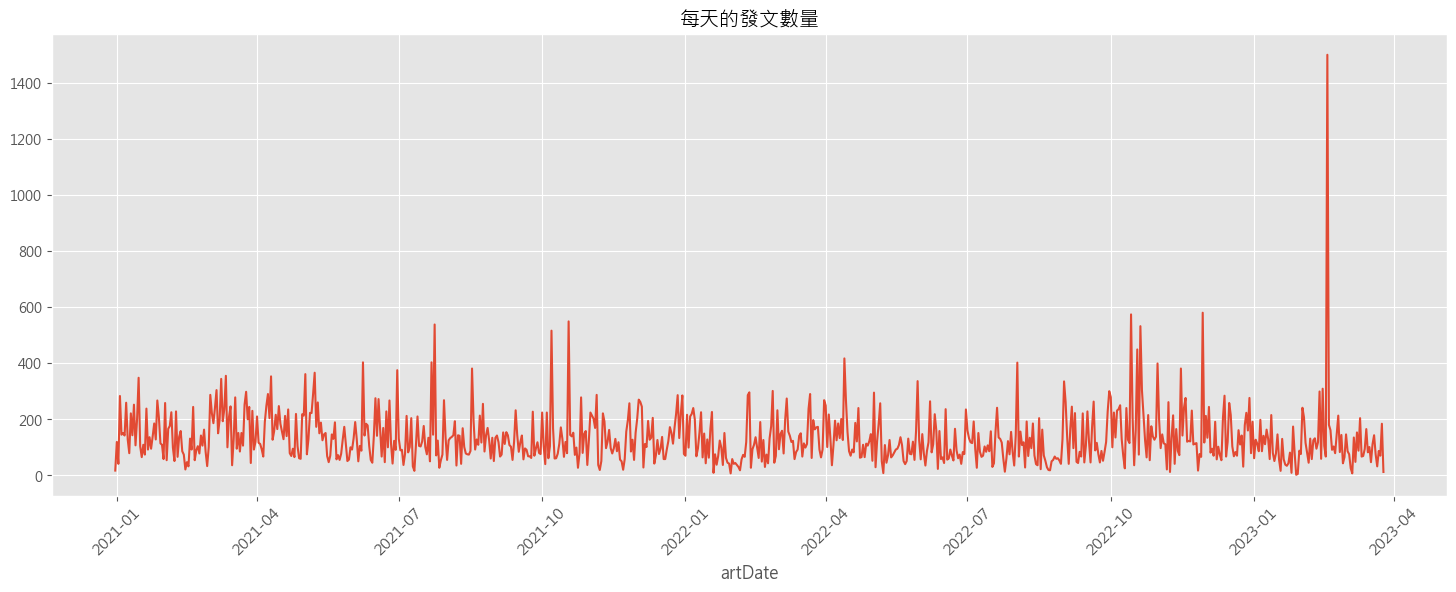

In [25]:
data_datecount = pd.DataFrame(df_.groupby('Date').size(),columns = ['count'])

plt.figure(figsize=(18,6))   # 顯示圖框架大小 (寬,高)
plt.style.use("ggplot")     # 使用ggplot主題樣式

plt.title('每天的發文數量')
plt.xlabel('artDate')
plt.xticks(rotation= 45, fontsize=11)
plt.plot(data_datecount.index,data_datecount['count'].tolist())

* 正負向情緒分數聲量折線圖圖

In [26]:
#文章和與LIWC情緒字典做合併
data_liwc = pd.merge(df_token, df_liwc, on=['word'],how='left')

#算出每天情緒總和(sentiment_count)
sentiment_count = data_liwc.groupby(['Date','sentiments'],as_index=False).size()
sentiment_count.head()

,Date,sentiments,size
0,2020-12-31,positive,1
1,2021-01-01,negative,3
2,2021-01-01,positive,22
3,2021-01-02,negative,2
4,2021-01-02,positive,2


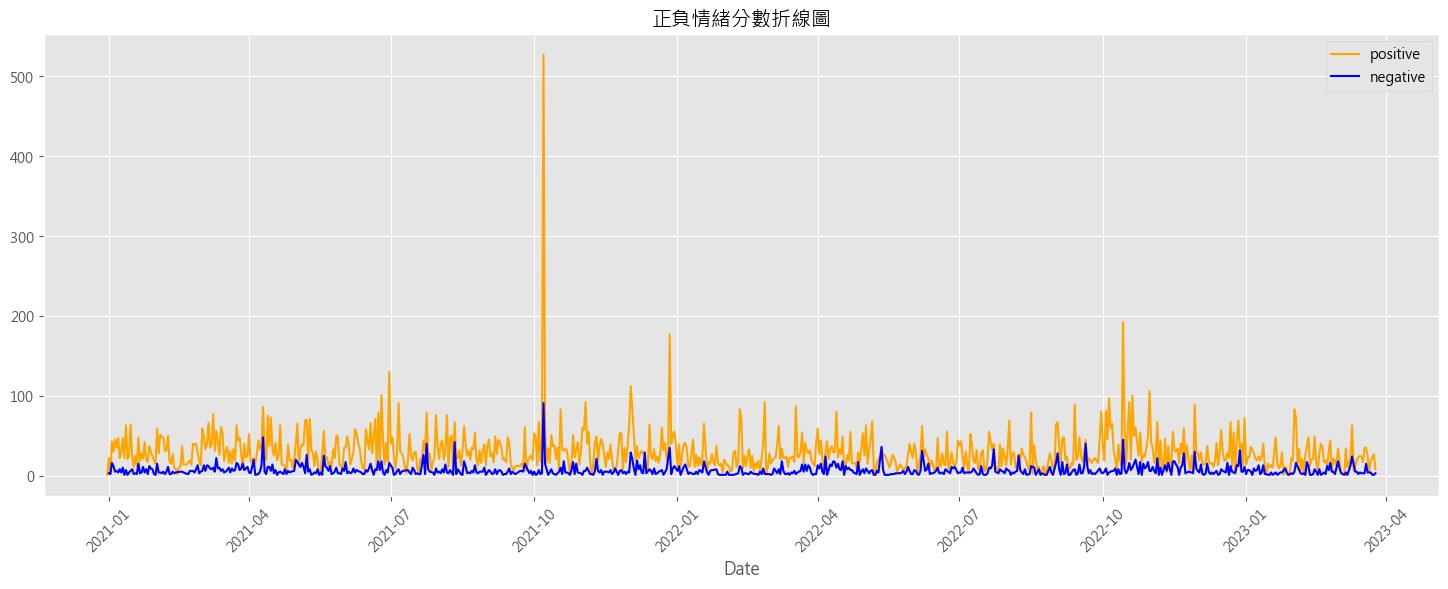

In [27]:
p = sentiment_count[sentiment_count['sentiments']=='positive']
n = sentiment_count[sentiment_count['sentiments']=='negative']

plt.figure(figsize=(18,6))   # 顯示圖框架大小 (寬,高)
# plt.style.use("default")     # 使用ggplot主題樣式
# plt.rcParams['font.sans-serif']=['SimHei'] #使中文能正常顯示
plt.title('正負情緒分數折線圖')
plt.plot(p['Date'].tolist(), p['size'], label='positive',color="orange")
plt.plot(n['Date'].tolist(), n['size'], label='negative',color="blue")
plt.xticks(rotation= 45, fontsize=10)
plt.legend() #顯示圖例
#plt.axvline(x='2021-03-18', color="red", ls="-")
plt.xlabel('Date')
plt.show()

* 正負向情緒分數比例折線圖圖

In [28]:
sentiment_count_r = sentiment_count.assign(ratio = sentiment_count.groupby(['Date'], as_index=False)
                                           .apply(lambda x: x['size'] / sum(x['size'])).reset_index(level=0, drop=True))

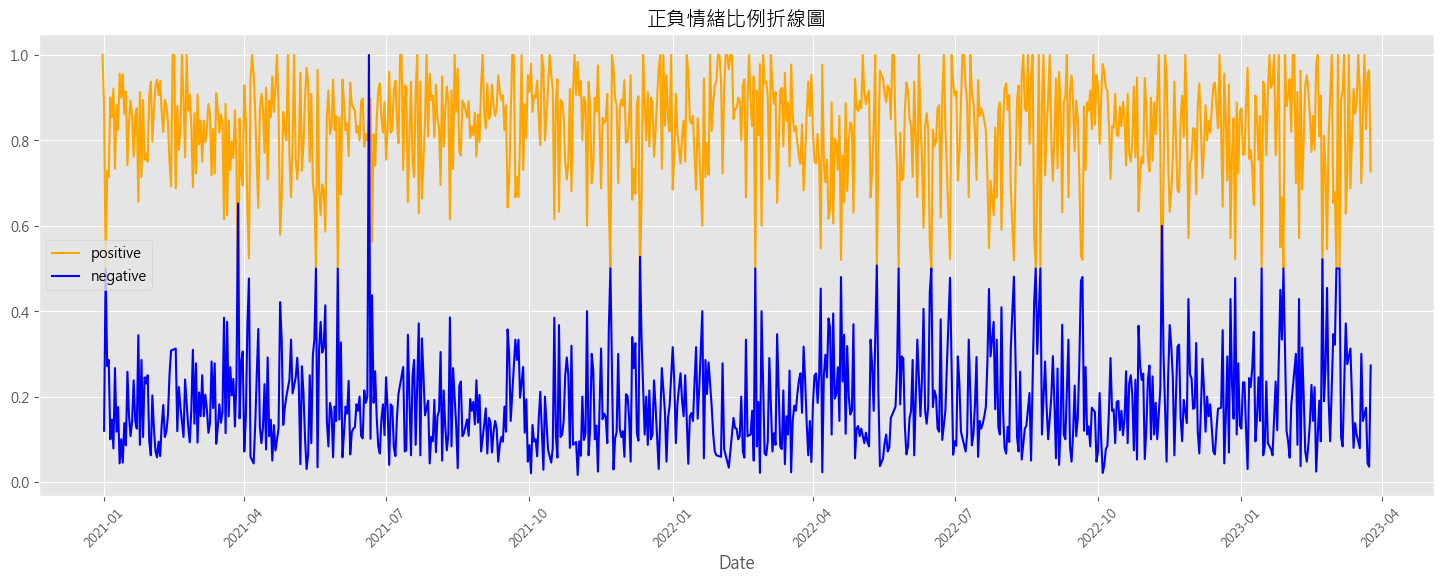

In [29]:
# sentiment_count_r = sentiment_count_r[sentiment_count_r['Date'] > '2021/03/13']
p = sentiment_count_r[sentiment_count_r['sentiments']=='positive']
n = sentiment_count_r[sentiment_count_r['sentiments']=='negative']

plt.figure(figsize=(18,6))   # 顯示圖框架大小 (寬,高)
# plt.style.use("default")     # 使用ggplot主題樣式
# plt.rcParams['font.sans-serif']=['SimHei'] #使中文能正常顯示
plt.title('正負情緒比例折線圖')
plt.plot(p['Date'].tolist(), p['ratio'], label='positive',color="orange")
plt.plot(n['Date'].tolist(), n['ratio'], label='negative',color="blue")
plt.xticks(rotation= 45, fontsize=9)
plt.legend() #顯示圖例
# plt.axvline(x=datetime.strptime('2021-03-18', "%Y-%m-%d"), color="red", ls="-")
# plt.axvline(x=datetime.strptime('2021-03-19', "%Y-%m-%d"), color="red", ls="-")
# plt.axvline(x=datetime.strptime('2021-03-25', "%Y-%m-%d"), color="red", ls="-")
# plt.axvline(x=datetime.strptime('2021-03-26', "%Y-%m-%d"), color="red", ls="-")
plt.xlabel('Date')
plt.show()

* 繪製詞頻為前10高的長條圖

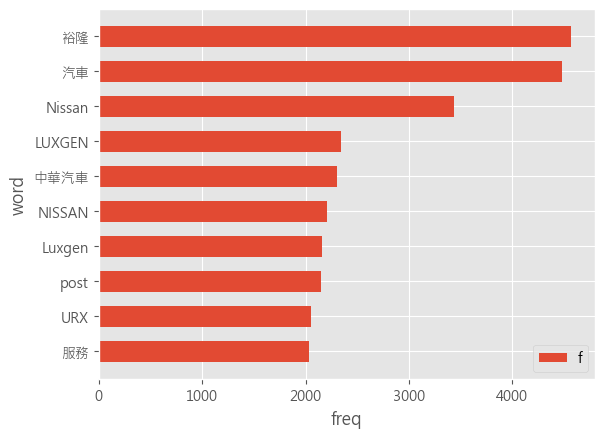

In [36]:
fig, ax = plt.subplots()
tmp = df_token_Freq_df['word'][:10]
tmpR = [tmp[i] for i in range(len(tmp)-1,-1,-1)]
ax.barh(tmpR,
        sorted(df_token_Freq_df['freq'][:10]), 
        height=0.6, 
        align='center')
ax.set_ylabel('word')
ax.set_xlabel('freq')
ax.legend('freq', loc ='lower right') 

In [43]:
def Wc_dict(df, Date, countB, countS):
    wc_df = (df.query('Date == @Date') # 篩選日期
             .query('size < @countB')# 篩選最大數量
             .query('size > @countS')# 篩選最小數量
             .sort_values('size', ascending=False))
    wc_dict = dict(zip(wc_df['word'], wc_df['size'])) #建立成dictionary
    
    return wc_dict

In [77]:
dict_0317 = Wc_dict(word_count,"2020-12-31",450,50)

font = './SourceHanSansTW-Regular.otf' #中文字型路徑
wordcloud = WordCloud(background_color='white',width=800, height = 400, font_path=font, colormap='viridis')
wordcloud.generate_from_frequencies(dict_0317)
plt.figure(figsize = (14,7))
plt.imshow(wordcloud)
plt.axis("off") #把作圖的座標軸關掉 
plt.show()

ValueError: We need at least 1 word to plot a word cloud, got 0.

* 情緒代表字

In [37]:
sentiment_sum = (word_count.merge(df_liwc, on='word')
                 .groupby(['word', 'sentiments'], as_index=False)
                 .agg({'size': 'sum'}))
sentiment_sum = sentiment_sum.sort_values(by=['size'], ascending=False)  #排序
sentiment_sum.head()

,word,sentiments,size
20,優惠,positive,595
115,朋友,positive,576
13,健康,positive,293
111,智慧,positive,235
59,安心,positive,225


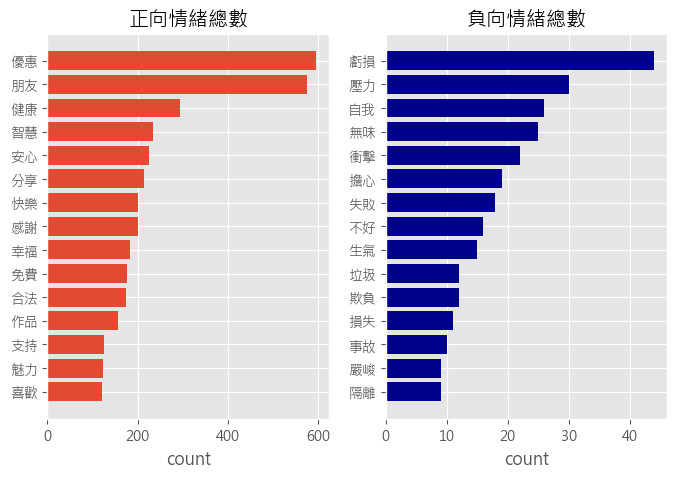

In [38]:
p_sum = sentiment_sum[sentiment_sum["sentiments"]=="positive"].head(15).sort_values(by=['size'])
n_sum = sentiment_sum[sentiment_sum["sentiments"]=="negative"].head(15).sort_values(by=['size'])

plt.figure(figsize=(8,5))   # 顯示圖框架大小 (寬,高)
# plt.style.use("ggplot")     # 使用ggplot主題樣式
# plt.rcParams['font.sans-serif']=['SimHei'] #使中文能正常顯示

plt.subplot(121)
plt.title('正向情緒總數')
plt.xlabel('count')
plt.barh(p_sum['word'],p_sum['size'])

plt.subplot(122)
plt.title('負向情緒總數')
plt.xlabel('count')
plt.barh(n_sum['word'],n_sum['size'],color="darkblue")


plt.show()

* 歸類正負面文章

In [39]:
article_type = (df_token.merge(df_liwc, on='word')
                .groupby(['artUrl', 'sentiments'], as_index=False)
                .size()
                .pivot_table(index='artUrl', columns='sentiments', values='size', fill_value=0)
                .reset_index(['artUrl'])
               )
article_type.head()

sentiments,artUrl,negative,positive
0,https://fb.com/100107974885084_354816846080861,1,1
1,https://fb.com/100260141871446_516635433567246,2,3
2,https://fb.com/100260141871446_553872419843547,0,3
3,https://fb.com/100639426653043_4054832281233718,2,0
4,https://fb.com/100639426653043_4055450164505263,7,5


In [40]:
article_type['type'] = article_type.apply(lambda x: 'positive' if x['positive'] > x['negative'] else 'negative',axis=1)
article_type.groupby('type', as_index=False).size()

,type,size
0,negative,966
1,positive,5280


* 正負情緒文章數量統計圖

In [42]:
article_type_date = article_type.merge(df_token.loc[:,["artUrl", "Date"]], how = 'left', on = 'artUrl')
article_type_date = article_type_date.groupby(['Date','type'], as_index=False).size()

In [44]:
article_type_date[(article_type_date['Date']>=datetime.strptime("2022-10-01", '%Y-%m-%d').date())&(article_type_date["Date"]<=datetime.strptime("2023-04-25", '%Y-%m-%d').date())]

,Date,type,size
1047,2022-10-01,negative,175
1048,2022-10-01,positive,1580
1049,2022-10-02,negative,322
1050,2022-10-02,positive,287
1051,2022-10-03,negative,242
...,...,...,...
1330,2023-03-22,negative,53
1331,2023-03-22,positive,544
1332,2023-03-23,positive,398
1333,2023-03-24,positive,708


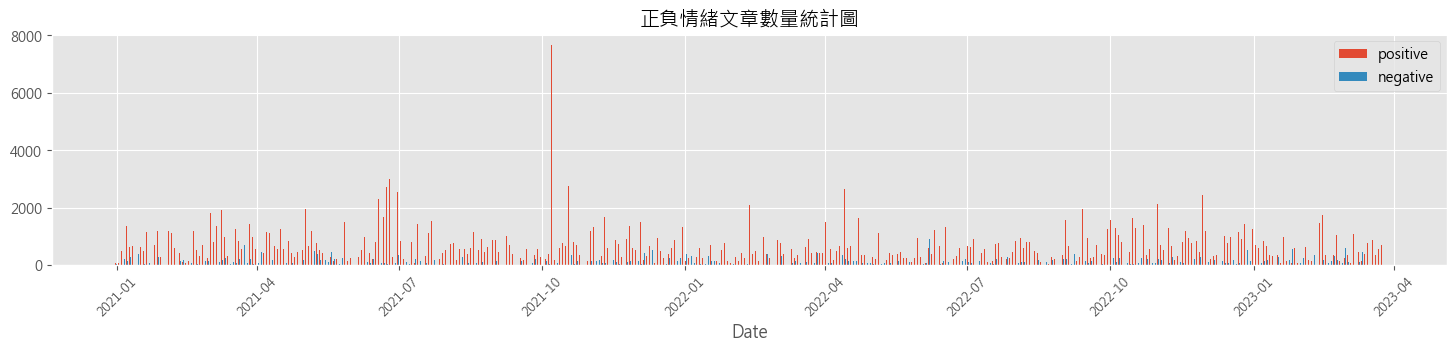

In [46]:
# ap = article_type_date[(article_type_date["type"]=="positive")&(article_type_date["Date"]>=datetime.strptime("2022-03-01", '%Y-%m-%d').date())]
# an = article_type_date[(article_type_date["type"]=="negative")&(article_type_date["Date"]>=datetime.strptime("2022-03-01", '%Y-%m-%d').date())]

ap = article_type_date[(article_type_date["type"]=="positive")]
an = article_type_date[(article_type_date["type"]=="negative")]

plt.figure(figsize=(18,3))   # 顯示圖框架大小 (寬,高)
# plt.style.use("ggplot")     # 使用ggplot主題樣式
# plt.rcParams['font.sans-serif']=['SimHei'] #使中文能正常顯示
plt.title('正負情緒文章數量統計圖')
plt.xlabel('Date')
plt.bar(ap['Date'],ap['size'],align="edge",width=0.25,label="positive")
plt.bar(an['Date'],an['size'],align="edge",width=-0.25,label="negative")
plt.legend()
plt.xticks(rotation= 45, fontsize=9)
plt.xlabel('Date')
plt.show()

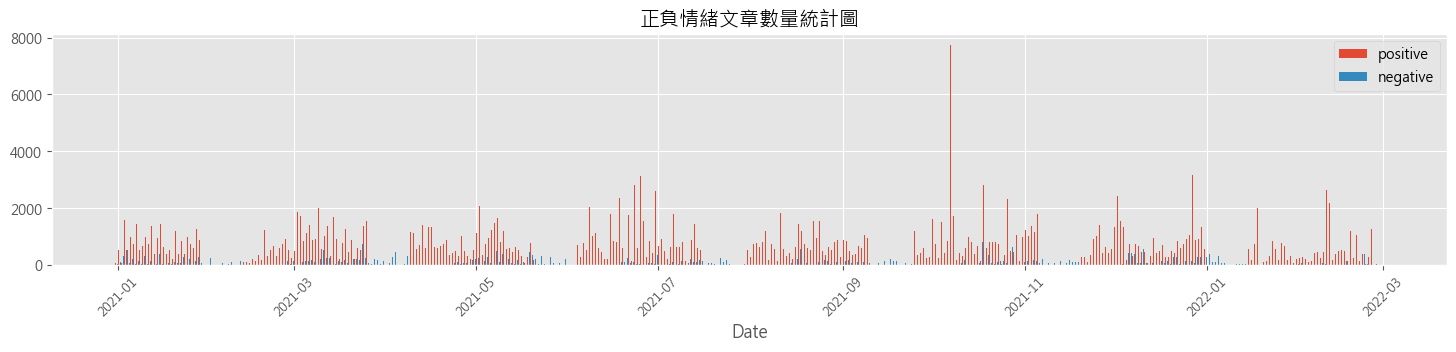

In [112]:
ap = article_type_date[(article_type_date["type"]=="positive")&(article_type_date["Date"]<=datetime.strptime("2022-03-01", '%Y-%m-%d').date())]
an = article_type_date[(article_type_date["type"]=="negative")&(article_type_date["Date"]<=datetime.strptime("2022-03-01", '%Y-%m-%d').date())]

# ap = article_type_date[(article_type_date["type"]=="positive")]
# an = article_type_date[(article_type_date["type"]=="negative")]

plt.figure(figsize=(18,3))   # 顯示圖框架大小 (寬,高)
# plt.style.use("ggplot")     # 使用ggplot主題樣式
# plt.rcParams['font.sans-serif']=['SimHei'] #使中文能正常顯示
plt.title('正負情緒文章數量統計圖')
plt.xlabel('Date')
plt.bar(ap['Date'],ap['size'],align="edge",width=0.25,label="positive")
plt.bar(an['Date'],an['size'],align="edge",width=-0.25,label="negative")
plt.legend()
plt.xticks(rotation= 45, fontsize=9)
plt.xlabel('Date')
plt.show()

In [48]:
print(df_[df_.artContent.str.contains('品牌')].shape)
print(df_[df_.artContent.str.contains('股票')].shape)
print(df_[df_.artContent.str.contains('電動車|純電|鴻海')].shape)
print(df_[df_.artContent.str.contains('徵才|實習')].shape)
print(df_[df_.artContent.str.contains('建教合作|建教|參訪|參觀')].shape)
print(df_[df_.artContent.str.contains('駕馭|體驗|抽獎|抽|好禮|車輛資訊|車輛|品質')].shape)
print(df_[df_.artContent.str.contains('尾牙')].shape)
print(df_[df_.artContent.str.contains('科技|性能|省油|馬力|動力|操控|外觀')].shape)
print(df_[df_.artContent.str.contains('安全|堅固|舒適')].shape)
print(df_[df_.artContent.str.contains('百萬內')].shape)

(1365, 9)
(76, 9)
(2666, 9)
(444, 9)
(112, 9)
(3210, 9)
(123, 9)
(3357, 9)
(1566, 9)
(207, 9)


In [20]:
(df_[df_.artContent.str.contains('購車|購買|購入|購')]).to_csv("fb_buy.csv", encoding="utf-8-sig")

In [60]:
df_buy = df_[df_.artContent.str.contains('購車|購買|購入|購')]
df_buy.shape

(1236, 6)

In [65]:
df_[df_.artContent.str.contains('薪資|福利')]

,artDate,artUrl,artPosterUrl,artPoster,artContent,comment_count
22,2023-03-17 12:00:07,https://fb.com/399528046874811_2400377153456547,https://fb.com/399528046874811,魔理花•ｍａｒｉｋａ•,\n釋放絕招，一路狂飆!\n\n休閒賽車手遊《王牌競速》已經上線啦！\n大家將成為賽車手，奔...,128
92,2022-04-13 07:27:38,https://fb.com/203598423025335_514708310024380,https://fb.com/203598423025335,黃偉哲,市民朋友午安，今天台南新增12名確診，以下為 #案例說明：\n\n1.仁德區30多歲男性案2...,173
221,2023-03-19 04:00:02,https://fb.com/689362877852733_763149288516047,https://fb.com/689362877852733,樂樂Lebaby,\n想看最厲害的必殺技嗎？\n釋放絕招，一路狂飆！\n「 王牌競速 」開服福利飆速爽送～～免...,55
421,2023-03-20 04:30:03,https://fb.com/465889890178575_796920115134792,https://fb.com/465889890178575,6tan,\n好朋友們，你們平常跟我一樣有飆車的習慣嗎？\n你有？\n其實我沒有，我已經報警抓你了\n...,33
590,2022-10-08 06:00:08,https://fb.com/124203007630468_2881259035502748,https://fb.com/124203007630468,Nissan,Nissan was live.\n#小編出任務 #KICKS\n#4大升級 #再給世界...,81
...,...,...,...,...,...,...
1864,2021-06-23 08:44:19,https://fb.com/1134460360038629_2582735328544451,https://fb.com/1134460360038629,清源健康事業,"清源健康事業 is in Hsinchu, Taiwan.\n文章出處 : https://...",0
1865,2021-06-23 08:05:13,https://fb.com/1134460360038629_2582715021879815,https://fb.com/1134460360038629,清源健康事業,"清源健康事業 is in Keelung, Taiwan.\n文章出處 : https://...",0
1866,2021-06-25 19:17:54,https://fb.com/1134460360038629_2584724375012213,https://fb.com/1134460360038629,清源健康事業,"清源健康事業 is in Hsinchu, Taiwan.\n文章出處 : https://...",0
1867,2021-06-25 18:59:45,https://fb.com/1134460360038629_2584713438346640,https://fb.com/1134460360038629,清源健康事業,清源健康事業 is in 桃園市桃園區.\n文章出處 : https://365freego...,0


In [62]:
df_buy[:50]#[df_buy.artPoster=='Luxgen Motor']

,artDate,artUrl,artPosterUrl,artPoster,artContent,comment_count
14,2022-06-09 11:00:02,https://fb.com/208766099163797_7833017220071942,https://fb.com/208766099163797,Yahoo奇摩汽車機車,保羅沃克開過的 R34 Nissan Skyline GT-R，在影迷心目中應該是無價之寶的...,299
56,2021-08-11 15:20:39,https://fb.com/1454054518192008_2838176639779782,https://fb.com/1454054518192008,Andy老爹,日本Nissan 公佈說，2022年式的戰神GT-R 兩款今年的接單量已經遠超過生產量，所以...,150
83,2023-03-09 08:35:47,https://fb.com/174605872591636_771751644296299,https://fb.com/174605872591636,廖盈婷(Snow),OMG！OMG！♥這不是NISSAN KICKS嗎？\n白頂狂藍～太帥了！I am BLUE...,98
116,2021-06-06 08:20:52,https://fb.com/125932204162879_340918187395581,https://fb.com/125932204162879,Choyce寫育兒、旅行與生活,Choyce寫育兒、旅行與生活 is feeling positive.\n拿到電動車！原來...,67
121,2021-03-03 14:59:30,https://fb.com/170631707275_10159130861962276,https://fb.com/170631707275,Joe's investment,Joe：「未來電動車一定會普及化成國民車，因為工業製品的趨勢就是那樣，持續改良和量產，然後成...,133
173,2021-09-09 01:43:52,https://fb.com/615156555285597_2324124117722157,https://fb.com/615156555285597,格上租車 閣下至上,#文末ㄔㄐ\n鄭重宣布!最聰明有彈性的購車方案來啦😎\n精打細算~讓資金更靈活運用😇\n超低...,304
180,2022-05-18 04:00:00,https://fb.com/124203007630468_5345819572135426,https://fb.com/124203007630468,Nissan,\n【購車上上籤 優惠總價值超過13萬】 \n#NISSAN有車皆吉 #以車防疫 ...,6
196,2022-03-03 01:11:13,https://fb.com/312813052147622_4789976954431187,https://fb.com/312813052147622,CHOCOBear 巧克熊環島餐車,\n「3.4月行程公告」\n\n真的久等了\n目前還有一些些場地還沒正式確定\n但先來跟各位...,548
197,2023-01-11 05:10:04,https://fb.com/165881294071328_1155190795140368,https://fb.com/165881294071328,Nissan裕新汽車生活誌,\n💓NISSAN 贈燈會跑趴神物💓\n相信大家都在準備迎接新年，大掃除?🧨大採購?🧨\n小...,235
210,2021-04-17 05:31:26,https://fb.com/236724334252_311323157020147,https://fb.com/236724334252,吳怡霈(Patty),這支影片 這篇文章 \n不是要你轉發送禮物\n\n但 透過你的分享 \n能讓台灣的孩子 受到...,39


In [56]:
pd.DataFrame(df_.groupby("artPoster")['artPoster'].count()).artPoster.sort_values(ascending=False)[:50]

artPoster
Luxgen Motor                  417
Yahoo奇摩汽車機車                   273
Nissan                        269
udn發燒車訊                       242
Luxgen花蓮汽車生活館                 236
U-CAR網路汽車共和國                  219
Basketball top5               172
7car 小七車觀點                    161
地球黃金線                         157
KingAutos 國王車訊                129
裕隆納智捷籃球隊                      122
Luxgen新店汽車生活館                 122
SBL 超級籃球聯賽                    106
自由時報汽車頻道                      104
小施汽車商行                         91
CarStuff人車事                    85
小洲嚴選中古車/優質二手車買賣                83
Sum首福汽車-全認証中古車                 81
CHOCOBear 巧克熊環島餐車              78
Mobile01                       71
台灣啤酒籃球隊                        71
Nissan Taipei-裕信粉絲團            70
小老婆汽機車資訊網                      67
經濟日報                           64
Andy老爹                         62
車水馬龍網                          61
CARTURE 車勢文化                   55
中華汽車人才培訓中心 / 知識的力量來自無私的分享      53
InCar 癮車報                      48
Zeek

In [50]:
df_[:5]

,artDate,artUrl,artPosterUrl,artPoster,artContent,comment_count,word,Date,time
0,2021-11-26 14:15:11,https://fb.com/114009453350823_283462350459804,https://fb.com/114009453350823,楊勇緯 Yang Yung Wei,【快訊】#阿布達比大滿貫賽🥋,2213,"[快訊, 阿布, 達比, 大滿貫]",2021-11-26,14:15:11
0,2021-11-26 14:15:11,https://fb.com/114009453350823_283462350459804,https://fb.com/114009453350823,楊勇緯 Yang Yung Wei,恭喜 勇緯摘下個人生涯第一面大滿貫賽金牌🥇,2213,"[恭喜, 勇緯, 摘下, 生涯, 第一面, 大滿貫, 金牌]",2021-11-26,14:15:11
0,2021-11-26 14:15:11,https://fb.com/114009453350823_283462350459804,https://fb.com/114009453350823,楊勇緯 Yang Yung Wei,#UnderArmour,2213,[UnderArmour],2021-11-26,14:15:11
0,2021-11-26 14:15:11,https://fb.com/114009453350823_283462350459804,https://fb.com/114009453350823,楊勇緯 Yang Yung Wei,#台灣大哥大OpenPossible,2213,"[大哥大, OpenPossible]",2021-11-26,14:15:11
0,2021-11-26 14:15:11,https://fb.com/114009453350823_283462350459804,https://fb.com/114009453350823,楊勇緯 Yang Yung Wei,#財團法人臺灣防盲基金會,2213,"[財團法人, 臺灣, 防盲, 基金會]",2021-11-26,14:15:11


In [84]:
df_[df_.index==1]

,system_id,artDate,artUrl,artPosterUrl,artPoster,artContent,comment_count
1,2,2022-04-01 14:55:31,https://fb.com/114009453350823_362101982595840,https://fb.com/114009453350823,楊勇緯 Yang Yung Wei,\n🎊 恭喜 勇緯奪得 #2022安塔利亞大滿貫賽 金牌🥇\n－\n 2022年好的開始\n...,1060
1,2,2022-10-01 04:00:07,https://fb.com/601181809942988_5712544455473339,https://fb.com/601181809942988,Luxgen Motor,\n【抽獎文 - n⁷純電代言人⚡️出席鴻海科技日】\n\nLUXGEN全新世代電動車n ⁷...,1449
1,2,2022-10-18 08:16:30,https://fb.com/147510625272443_680978470053290,https://fb.com/147510625272443,毒舌痞子的543日記,\n延續最近延燒的合法國產掀頂露營車話題，簡單來說，中華汽車賣A180，出具“原廠認證”，阡...,958


In [75]:
(df_[df_.system_id==231])

,system_id,artDate,artUrl,artPosterUrl,artPoster,artContent,comment_count
230,231,2022-12-22 14:00:55,https://fb.com/116153345102198_5916157075101767,https://fb.com/116153345102198,Option改裝車訊,"最後的GT-R R35?\n北美Nissan發佈「不停產!」,GT-R 2023年車型驚喜登...",79
230,231,2021-07-09 04:00:40,https://fb.com/601181809942988_4330935916967540,https://fb.com/601181809942988,Luxgen Motor,\n【因為有要保護的人，所以我不害怕】\n在「裕隆集團抗疫微光專案」裡，我們的任務是在一所已...,6
230,231,2021-06-05 05:41:09,https://fb.com/159687017502304_2336345319836452,https://fb.com/159687017502304,PTT Gossiping 批踢踢八卦板,[新聞] 力挺抗疫！ 裕隆集團捐10部專車及防疫物資逾1500萬 https://dis...,18


In [67]:
df_[df_.artContent.str.contains("裕隆集團抗疫微光專案")]

,system_id,artDate,artUrl,artPosterUrl,artPoster,artContent,comment_count
3007,3008,2021-07-09 04:00:40,https://fb.com/601181809942988_4330935916967540,https://fb.com/601181809942988,Luxgen Motor,\n【因為有要保護的人，所以我不害怕】\n在「裕隆集團抗疫微光專案」裡，我們的任務是在一所已...,6
3585,3586,2021-07-02 04:00:00,https://fb.com/601181809942988_4318686211525844,https://fb.com/601181809942988,Luxgen Motor,\n【病人的健康交給前線醫護，車子的健康由我們守護!】\n\n記得當初接獲「裕隆集團抗疫微光...,3
230,231,2021-07-09 04:00:40,https://fb.com/601181809942988_4330935916967540,https://fb.com/601181809942988,Luxgen Motor,\n【因為有要保護的人，所以我不害怕】\n在「裕隆集團抗疫微光專案」裡，我們的任務是在一所已...,6
571,572,2021-07-02 04:00:00,https://fb.com/601181809942988_4318686211525844,https://fb.com/601181809942988,Luxgen Motor,\n【病人的健康交給前線醫護，車子的健康由我們守護!】\n\n記得當初接獲「裕隆集團抗疫微光...,3


In [63]:
df_[df_.artContent.str.contains("薪資|福利")]

,artDate,artUrl,artPosterUrl,artPoster,artContent,comment_count
22,2023-03-17 12:00:07,https://fb.com/399528046874811_2400377153456547,https://fb.com/399528046874811,魔理花•ｍａｒｉｋａ•,\n釋放絕招，一路狂飆!\n\n休閒賽車手遊《王牌競速》已經上線啦！\n大家將成為賽車手，奔...,128
92,2022-04-13 07:27:38,https://fb.com/203598423025335_514708310024380,https://fb.com/203598423025335,黃偉哲,市民朋友午安，今天台南新增12名確診，以下為 #案例說明：\n\n1.仁德區30多歲男性案2...,173
221,2023-03-19 04:00:02,https://fb.com/689362877852733_763149288516047,https://fb.com/689362877852733,樂樂Lebaby,\n想看最厲害的必殺技嗎？\n釋放絕招，一路狂飆！\n「 王牌競速 」開服福利飆速爽送～～免...,55
421,2023-03-20 04:30:03,https://fb.com/465889890178575_796920115134792,https://fb.com/465889890178575,6tan,\n好朋友們，你們平常跟我一樣有飆車的習慣嗎？\n你有？\n其實我沒有，我已經報警抓你了\n...,33
590,2022-10-08 06:00:08,https://fb.com/124203007630468_2881259035502748,https://fb.com/124203007630468,Nissan,Nissan was live.\n#小編出任務 #KICKS\n#4大升級 #再給世界...,81
...,...,...,...,...,...,...
1864,2021-06-23 08:44:19,https://fb.com/1134460360038629_2582735328544451,https://fb.com/1134460360038629,清源健康事業,"清源健康事業 is in Hsinchu, Taiwan.\n文章出處 : https://...",0
1865,2021-06-23 08:05:13,https://fb.com/1134460360038629_2582715021879815,https://fb.com/1134460360038629,清源健康事業,"清源健康事業 is in Keelung, Taiwan.\n文章出處 : https://...",0
1866,2021-06-25 19:17:54,https://fb.com/1134460360038629_2584724375012213,https://fb.com/1134460360038629,清源健康事業,"清源健康事業 is in Hsinchu, Taiwan.\n文章出處 : https://...",0
1867,2021-06-25 18:59:45,https://fb.com/1134460360038629_2584713438346640,https://fb.com/1134460360038629,清源健康事業,清源健康事業 is in 桃園市桃園區.\n文章出處 : https://365freego...,0


In [66]:
df_tmp = df_[(df_.artPoster == 'Luxgen Motor')&(df_.artContent.str.contains("維修"))&(~df_.artContent.str.contains("電"))]#電73、
print(len(df_tmp))
df_tmp.artUrl

10


3007    https://fb.com/601181809942988_4330935916967540
3585    https://fb.com/601181809942988_4318686211525844
230     https://fb.com/601181809942988_4330935916967540
347     https://fb.com/601181809942988_4275342959193503
391     https://fb.com/601181809942988_5000549853339473
492     https://fb.com/601181809942988_4296392437088555
571     https://fb.com/601181809942988_4318686211525844
651     https://fb.com/601181809942988_4245835818810884
807     https://fb.com/601181809942988_4684502114944250
812     https://fb.com/601181809942988_5456877107706743
Name: artUrl, dtype: object

In [34]:
pd.DataFrame(df_buy.groupby("artPoster")['artPoster'].count()).artPoster.sort_values(ascending=False)[:50]

artPoster
Luxgen Motor                  103
SBL 超級籃球聯賽                     57
Nissan                         47
Luxgen花蓮汽車生活館                  44
Sum首福汽車-全認証中古車                 39
弘倉汽車 - 中古車買賣（高價收購）             36
Luxgen新店汽車生活館                  34
udn發燒車訊                        31
車水馬龍網                          27
U-CAR網路汽車共和國                   26
比德堡【崁入式】晴雨窗                    26
KingAutos 國王車訊                 26
Yahoo奇摩汽車機車                    24
杰運汽車 Autostar 最透明的買車賣車平台       22
西瓜嚴選精品汽車                       21
亞路行動百貨                         15
經濟日報                           14
Go Choice購車趣                   14
地球黃金線                          14
三菱Mitsubishi Motors Taiwan     12
CHOCOBear 巧克熊環島餐車              10
裕隆納智捷籃球隊                       10
RCi HID LED                    10
7car 小七車觀點                     10
Cs-車宮車業                         9
CARTURE 車勢文化                    9
Zeek玩家誌                         9
見發堆高機 / 建發堆高機                   8
Nissan Taipei-裕信粉絲團             8
三菱認證